In [1]:
#Import libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime as dt

In [2]:
#Define date range
start_date = dt.datetime(2024, 1, 1)
end_date = dt.datetime(2025, 1, 1)

In [3]:
#Define stock ticker symbols

symbol_list = ['AAPL', 'META', 'TSLA', 'PLTR', 'GOOG', 'MSFT']

In [4]:
# Download stock data
stock_data = yf.download(symbol_list, start=start_date, end=end_date, auto_adjust=True)
stock_data = stock_data.fillna(method='ffill')

[*********************100%***********************]  6 of 6 completed
<ipython-input-4-584f49a519d4>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data = stock_data.fillna(method='ffill')


In [5]:
#Compute daily returns
returns = stock_data['Close'].pct_change()

In [6]:
#statistical insights
mean_returns = returns.mean() * 252 # Annualized return
volatility = returns.std() * np.sqrt(252) #Annualized volatility (risk)

In [7]:
#Display mean return & volatility
stats_df = pd.DataFrame({'Annualized Return': mean_returns, 'Annualized Volatility': volatility})
print("\n📊 Stock Performance Summary:\n")
print(stats_df)



📊 Stock Performance Summary:

        Annualized Return  Annualized Volatility
Ticker                                          
AAPL             0.330511               0.224197
GOOG             0.354157               0.277526
META             0.596007               0.364780
MSFT             0.155958               0.199495
PLTR             1.721520               0.642359
TSLA             0.685614               0.636218


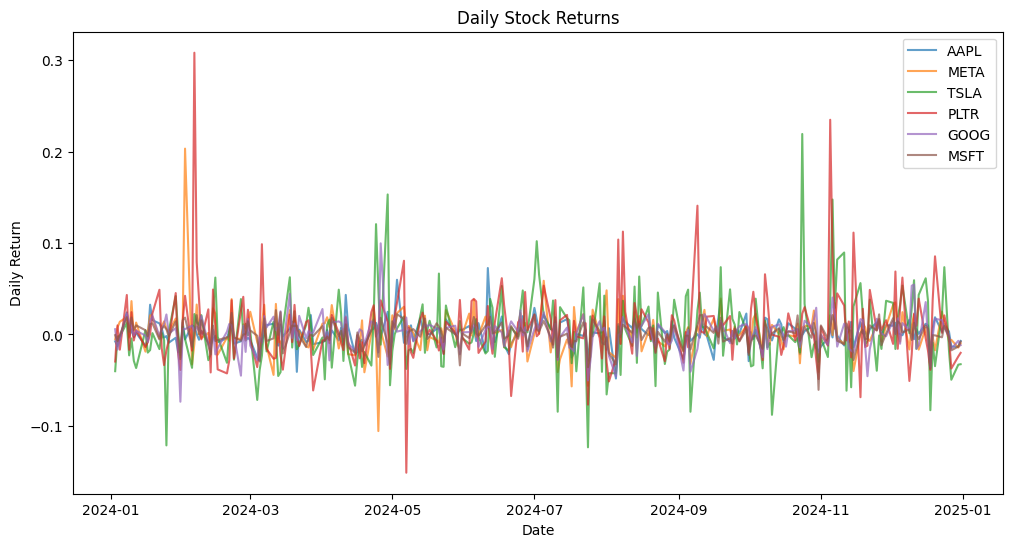

In [8]:
# Plot stock return trends
plt.figure(figsize=(12, 6))
for stock in symbol_list:
    plt.plot(returns.index, returns[stock], label=stock, alpha=0.7)
plt.legend()
plt.title("Daily Stock Returns")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.show()


In [9]:
# Compute correlation matrix
corr_matrix = returns.corr()

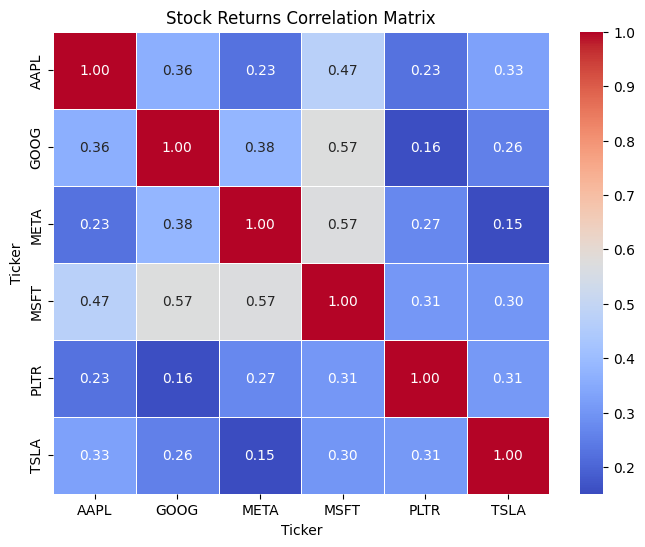

In [10]:
# Plot heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Stock Returns Correlation Matrix")
plt.show()

I analysed annualized stock returns for this stocks in the last year and how the returns correlated with one another for the select stocks. The correlation was relatively low.

The data was obtained from yfinance.